<a href="https://colab.research.google.com/github/kevirui/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

def convertirADateTime(x):
    x['Fecha de Compra'] = pd.to_datetime(x['Fecha de Compra'], dayfirst=True)
def crearColumnaMes(x):
    x['Mes'] = x['Fecha de Compra'].dt.month
def crearColumnaMesNombre(x):
    x['Mes_nombre'] = x['Mes'].apply(lambda x: calendar.month_name[x])

# Convertir las fechas de la columna "fecha" a datetime para el entendimiento del lenguaje
convertirADateTime(tienda)
convertirADateTime(tienda2)
convertirADateTime(tienda3)
convertirADateTime(tienda4)

# Crear columna con el mes
crearColumnaMes(tienda)
crearColumnaMes(tienda2)
crearColumnaMes(tienda3)
crearColumnaMes(tienda4)

# Crear columna con el nombre del mes
crearColumnaMesNombre(tienda)
crearColumnaMesNombre(tienda2)
crearColumnaMesNombre(tienda3)
crearColumnaMesNombre(tienda4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Mes,Mes_nombre
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,1,January
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,5,May
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,3,March
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,5,May
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,11,November


#1. Análisis de facturación



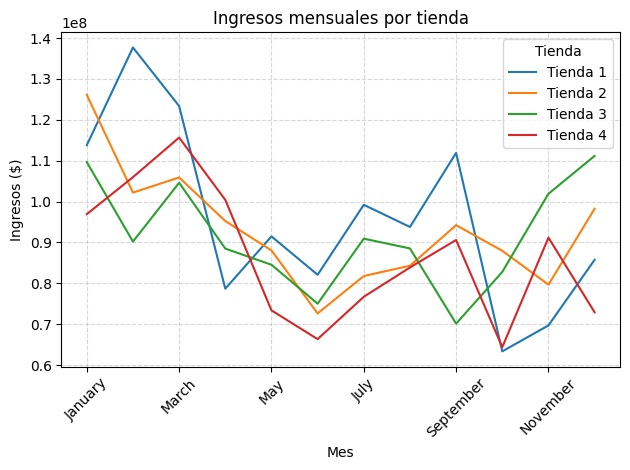

In [66]:
# Calculo de ingresos totales de las tiendas (por las dudas)
ingresoTotal = lambda tiendaN: sum(tiendaN.Precio)
ingresosTotales = {
    'Tienda 1': ingresoTotal(tienda),
    'Tienda 2': ingresoTotal(tienda2),
    'Tienda 3': ingresoTotal(tienda3),
    'Tienda 4': ingresoTotal(tienda4)
}

# Agrupo por mes sumando los ingresos totales de cada mes
ingresoMensual = lambda x: x.groupby(['Mes_nombre'])['Precio'].sum().reset_index()
ingresosMensuales = {
    'Tienda 1': ingresoMensual(tienda),
    'Tienda 2': ingresoMensual(tienda2),
    'Tienda 3': ingresoMensual(tienda3),
    'Tienda 4': ingresoMensual(tienda4)
}

# Uno todas las tiendas en una sola con la columna 'Tienda'
for nombre, df in ingresosMensuales.items():
  df['Tienda'] = nombre  # Agrego columna el nombre de la tienda

# Concatenar todas las tiendas en una
tiendasEIngresos = pd.concat(ingresosMensuales.values(), ignore_index=True)

pivote = tiendasEIngresos.pivot(index='Mes_nombre', columns='Tienda', values='Precio')
pivote = pivote.loc[calendar.month_name[1:]]  # ordena por meses de enero a diciembre

pivote.plot(kind='line')
plt.title("Ingresos mensuales por tienda")
plt.xlabel("Mes")
plt.ylabel("Ingresos ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Tienda")
plt.show()

# df_ingresos = pd.Series(ingresosTotales)
# df_ingresos.plot(kind='line', color='skyblue', marker='o')
# plt.title("Ingresos totales por tienda")
# plt.ylabel('Ingresos ($)')
# plt.xlabel('Tienda')
# plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

# 2. Ventas por categoría

In [32]:
traerTotalCategoria = lambda tiendaN: tiendaN['Categoría del Producto'].value_counts()
traerVentaTotalPorCategoria = lambda tiendaN: tiendaN.groupby('Categoría del Producto')['Precio'].sum()

# print("----------- Ventas totales por categoria -----------")
# print("tienda 1: \n", traerTotalCategoria(tienda))
# print("-----------o-----------")
# print("tienda 2: \n", traerTotalCategoria(tienda2))
# print("-----------o-----------")
# print("tienda 3: \n", traerTotalCategoria(tienda3))
# print("-----------o-----------")
# print("tienda 4: \n", traerTotalCategoria(tienda4))

# print("\n----------- Ventas totales de ganancias por categoria -----------")
# print("tienda 1: \n", round(traerVentaTotalPorCategoria(tienda)))
# print("-----------o-----------")
# print("tienda 2: \n", round(traerVentaTotalPorCategoria(tienda2)))
# print("-----------o-----------")
# print("tienda 3: \n", round(traerVentaTotalPorCategoria(tienda3)))
# print("-----------o-----------")
# print("tienda 4: \n", round(traerVentaTotalPorCategoria(tienda4)))


# 3. Calificación promedio de la tienda


In [29]:
traerPromedioCalificacion = lambda x: round(x['Calificación'].mean(), 2)

# print("----------- Calificaciones promedio de cada tienda -----------")
# print("tienda 1: ", traerPromedioCalificacion(tienda))
# print("tienda 2: ", traerPromedioCalificacion(tienda2))
# print("tienda 3: ", traerPromedioCalificacion(tienda3))
# print("tienda 4: ", traerPromedioCalificacion(tienda4))

# 4. Productos más y menos vendidos

In [30]:
traerProductosDestacados = lambda x: x['Producto'].value_counts()

# print("----------- Productos destacados por tienda -----------")
# print("tienda 1: \n", traerProductosDestacados(tienda))
# print("-----------o-----------")
# print("tienda 2: \n", traerProductosDestacados(tienda2))
# print("-----------o-----------")
# print("tienda 3: \n", traerProductosDestacados(tienda3))
# print("-----------o-----------")
# print("tienda 4: \n", traerProductosDestacados(tienda4))

# 5. Envío promedio por tienda

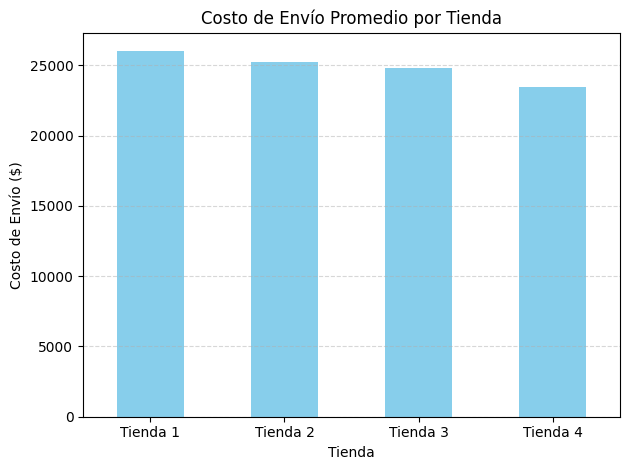

In [48]:
traerEnvioPromedio = lambda x: round(x['Costo de envío'].mean())

costos_envio = {
    'Tienda 1': traerEnvioPromedio(tienda),
    'Tienda 2': traerEnvioPromedio(tienda2),
    'Tienda 3': traerEnvioPromedio(tienda3),
    'Tienda 4': traerEnvioPromedio(tienda4)
}

df_envios = pd.Series(costos_envio)

df_envios.plot(kind='bar', color='skyblue')

plt.title("Costo de Envío Promedio por Tienda")
plt.ylabel("Costo de Envío ($)")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# print("----------- Envio promedio de cada tienda -----------")
# print(f"Envio promedio para tienda 1: {traerEnvioPromedio(tienda)}$")
# print(f"Envio promedio para tienda 2: {traerEnvioPromedio(tienda2)}$")
# print(f"Envio promedio para tienda 3: {traerEnvioPromedio(tienda3)}$")
# print(f"Envio promedio para tienda 4: {traerEnvioPromedio(tienda4)}$")